# P60 Gitterschwingungen in Festkörpern

### Import libaries

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import seaborn as sns
import polars as pl

# inset in plots
from matplotlib import cbook
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, zoomed_inset_axes, inset_axes



from matplotlib.ticker import FuncFormatter
from matplotlib.colors import TABLEAU_COLORS, same_color
from scipy.optimize import curve_fit
from scipy.stats import linregress
from numpy import sqrt


%matplotlib inline

### Set sytle parameters

In [ ]:
#plt.style.available[:30]

plt.style.use('default')
plt.rcParams['text.usetex'] = False
plt.rcParams['mathtext.default'] = 'regular'


### Get and set colors

In [ ]:
# Get the color cycle
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

print(colors)


### Define Lorentzians and FWHM functions

In [ ]:
# Lorentz function
def lorentzian(x, x0, gamma, a, y0):
    return a * gamma**2 / ((x - x0)**2 + gamma**2) + y0

# Calculate Full Width at Half Maximum (FWHM) for Lorentzian
def lorentzian_fwhm(gamma):
    return 2 * gamma

# double Lorentzian function
def double_lorentzian(x, x01, gamma1, a1, x02, gamma2, a2 , y0):
    L1 = (a1 * (gamma1**2 / ((x - x01)**2 + gamma1**2)))
    L2 = (a2 * (gamma2**2 / ((x - x02)**2 + gamma2**2)))
    return L1 + L2 + y0

# sum of 3 lorentzians
def three_lorentzian(x, x01, gamma1, a1, x02, gamma2, a2, x03, gamma3, a3, y0):
    L1 = a1 * (gamma1**2 / ((x - x01)**2 + gamma1**2))
    L2 = a2 * (gamma2**2 / ((x - x02)**2 + gamma2**2))
    L3 = a3 * (gamma3**2 / ((x - x03)**2 + gamma3**2))
    return L1 + L2 + L3 + y0


# sum of 4 lorentzians
def four_lorentzian(x, x01, gamma1, a1, x02, gamma2, a2, x03, gamma3, a3, x04, gamma4, a4, y0):
    L1 = a1 * (gamma1**2 / ((x - x01)**2 + gamma1**2))
    L2 = a2 * (gamma2**2 / ((x - x02)**2 + gamma2**2))
    L3 = a3 * (gamma3**2 / ((x - x03)**2 + gamma3**2))
    L4 = a4 * (gamma4**2 / ((x - x04)**2 + gamma4**2))
    return L1 + L2 + L3 + L4 + y0


# sum of 5 lorentzians
def five_lorentzian(x, x01, gamma1, a1, x02, gamma2, a2, x03, gamma3, a3, x04, gamma4, a4, x05, gamma5, a5, y0):
    L1 = a1 * (gamma1**2 / ((x - x01)**2 + gamma1**2))
    L2 = a2 * (gamma2**2 / ((x - x02)**2 + gamma2**2))
    L3 = a3 * (gamma3**2 / ((x - x03)**2 + gamma3**2))
    L4 = a4 * (gamma4**2 / ((x - x04)**2 + gamma4**2))
    L5 = a5 * (gamma5**2 / ((x - x05)**2 + gamma5**2))
    return L1 + L2 + L3 + L4 + L5 + y0


# Fitting Lorentzian to data in specific range
def n_lorentzians_fit (df, function, xmin, xmax, p0):
    df_region = (df['Wavenumber'] > xmin) & (df['Wavenumber'] < xmax)
    xdata = df['Wavenumber'][df_region]
    ydata = df['Intensity'][df_region]
    params, cov = curve_fit(function, xdata, ydata, p0)
    perr = np.sqrt(np.diag(cov))

    return xdata, params, perr


# Fitting Lorentzian to data in specific range shifted
def n_lorentzians_fit_shifted (df, function, xmin, xmax, p0):
    df_region = (df['Wavenumber_shifted'] > xmin) & (df['Wavenumber_shifted'] < xmax)
    xdata = df['Wavenumber_shifted'][df_region]
    ydata = df['Intensity'][df_region]
    params, cov = curve_fit(function, xdata, ydata, p0)
    perr = np.sqrt(np.diag(cov))

    return xdata, params, perr

### Import data Si (100)

In [ ]:
file_path_si100_parallel = r'C:\Fortgeschrittenenpraktikum\P60\Auswertung\Messwerte\si100 polarisation 0grad\\'
file_path_si100_perpendicular = r'C:\Fortgeschrittenenpraktikum\P60\Auswertung\Messwerte\si100 polarisation 90grad\\'


file_names = ['si100_0grad.txt', 'si100_15grad.txt', 'si100_30grad.txt', 'si100_45grad.txt', 
              'si100_60grad.txt', 'si100_75grad.txt', 'si100_90grad.txt',
              'si100_105grad.txt', 'si100_120grad.txt', 'si100_135grad.txt', 
              'si100_150grad.txt', 'si100_165grad.txt', 'si100_180grad.txt']

dataframes_si100_parallel = []
dataframes_si100_perpendicular = []


for file in file_names:
    df = pd.read_csv(file_path_si100_parallel + file, sep=r'\s+', names=['Wavenumber', 'Intensity'])
    dataframes_si100_parallel.append(df)

    
for file in file_names:
    df = pd.read_csv(file_path_si100_perpendicular + file, sep=r'\s+', names=['Wavenumber', 'Intensity'])
    dataframes_si100_perpendicular.append(df)


#dataframes_si100_perpendicular[0].head()

### Importing data Si (111)

In [ ]:
file_path_si111 = r'C:\Fortgeschrittenenpraktikum\P60\Auswertung\Messwerte\si111\\'

df_si111_parallel = pd.read_csv(file_path_si111 + 'si111_0grad_polarisiert.txt', sep=r'\s+', names=['Wavenumber', 'Intensity'])
df_si111_perpendicular = pd.read_csv(file_path_si111 + 'si111_90grad_polarisiert.txt', sep=r'\s+', names=['Wavenumber', 'Intensity'])


### Calculating Wavenumber shift and apply to data and Wavenumber error

In [ ]:
# Calculating Wavenumber shift by fitting lorentzian to Rayleigh-Peaks of Si (100) and Si (111)

rayleigh_x0 = []
rayleigh_gamma = []

# Si (100) parallel
for i in range(13):
    _, params, _ = n_lorentzians_fit(dataframes_si100_parallel[i], lorentzian, -20, 15, p0=None)
    rayleigh_x0.append(params[0])
    rayleigh_gamma.append(lorentzian_fwhm(params[1]))

# Si (100) perpendicular
for i in range(13):
    _, params, _ = n_lorentzians_fit(dataframes_si100_perpendicular[i], lorentzian, -20, 15, p0=None)
    rayleigh_x0.append(params[0])
    rayleigh_gamma.append(lorentzian_fwhm(params[1]))


# Si (111) parallel and perpendicular
_, params_si111_par, _ =n_lorentzians_fit(df_si111_parallel, lorentzian, -20, 15, p0=None)
_, params_si111_per, _ =n_lorentzians_fit(df_si111_perpendicular, lorentzian, -20, 15, p0=None)

rayleigh_x0.append(params_si111_par[0])
rayleigh_x0.append(params_si111_per[0])
rayleigh_gamma.append(lorentzian_fwhm(params_si111_par[1]))
rayleigh_gamma.append(lorentzian_fwhm(params_si111_par[1]))

# calculate wavenumber shift
wavenumber_shift = np.mean(rayleigh_x0)
print(wavenumber_shift)


# calculate wavenumber error with fwhm of rayleigh peak
ray_gamma_series = pd.Series(rayleigh_gamma)
wavenumber_error = np.sqrt((ray_gamma_series**2).sum()) / (ray_gamma_series.count())
print(wavenumber_error)



for i in range(13):
    dataframes_si100_parallel[i]['Wavenumber_shifted'] = dataframes_si100_parallel[i]['Wavenumber'] - wavenumber_shift
    dataframes_si100_perpendicular[i]['Wavenumber_shifted'] = dataframes_si100_perpendicular[i]['Wavenumber'] - wavenumber_shift




# Si (100) determine x- and y-axis

### Fitting Anti-Stokes and Normalize Intensities of Si (100) parallel

In [ ]:
Lorentzian_amplitudes = []
Lorentzian_amplitudes_error = []

for i in range(13):

    # Region and amplitude for inital fit
    antistokes_peak_region = (dataframes_si100_parallel[i]['Wavenumber_shifted'] > 500) & (dataframes_si100_parallel[i]['Wavenumber_shifted'] < 540)
    antistokes_amplitude = dataframes_si100_parallel[i]['Intensity'][antistokes_peak_region].max()
    background = dataframes_si100_parallel[i]['Intensity'][antistokes_peak_region].min()

    # Initial guess [center, width, amplitude]
    p0_antistokes = [521, 5 , antistokes_amplitude, background]

    # Fit with lorentzian
    x_data = dataframes_si100_parallel[i]['Wavenumber_shifted'][antistokes_peak_region]
    y_data = dataframes_si100_parallel[i]['Intensity'][antistokes_peak_region]
    params, cov = curve_fit(lorentzian, x_data, y_data, p0=p0_antistokes)

    # Amplitude and Error of lorentzian fit
    cov_err = np.sqrt(np.diag(cov))
    Lorentzian_amplitudes.append(params[2]+cov_err[2]) # amplitude+error to stay between 0-1 with errors
    Lorentzian_amplitudes_error.append(cov_err[2])



# Normilize Intensities, Amplitude fitted with lorentzian
norm = max(Lorentzian_amplitudes)
Lorentzian_amplitudes_normilized = Lorentzian_amplitudes/norm
Lorentzian_amplitudes_normilized_error = Lorentzian_amplitudes_error/norm



### Fitting Anti-Stokes and Normalize Intensities of Si (100) perpendicular

In [ ]:
Lorentzian_amplitudes_per = []
Lorentzian_amplitudes_per_error = []

for i in range(13):

    # Region and amplitude for inital fit
    antistokes_peak_region_per = (dataframes_si100_perpendicular[i]['Wavenumber_shifted'] > 500) & (dataframes_si100_perpendicular[i]['Wavenumber_shifted'] < 540)
    antistokes_amplitude_per = dataframes_si100_perpendicular[i]['Intensity'][antistokes_peak_region_per].max()
    background = dataframes_si100_perpendicular[i]['Intensity'][antistokes_peak_region_per].min()

    # Initial guess [center, width, amplitude]
    p0_antistokes = [521, 10 , antistokes_amplitude_per, background]

    # Fit with lorentzian
    x_data = dataframes_si100_perpendicular[i]['Wavenumber_shifted'][antistokes_peak_region_per]
    y_data = dataframes_si100_perpendicular[i]['Intensity'][antistokes_peak_region_per]
    params, cov = curve_fit(lorentzian, x_data, y_data, p0=p0_antistokes)

    # Amplitude and error of lorentzian fit
    cov_per_error = np.sqrt(np.diag(cov))
    Lorentzian_amplitudes_per.append(params[2] + cov_per_error[2])
    Lorentzian_amplitudes_per_error.append(cov_per_error[2])


# Normilize Intensities, Amplitude fitted with lorentzian
del Lorentzian_amplitudes_per[1] #remove intensity at 15°
del Lorentzian_amplitudes_per_error[1] # remove error at 15°

norm_per = max(Lorentzian_amplitudes_per)
Lorentzian_amplitudes_normilized_per = Lorentzian_amplitudes_per/norm_per
Lorentzian_amplitudes_normilized_per_error = Lorentzian_amplitudes_per_error/norm_per


### Plotting the data of Si (100) parallel

In [ ]:
# Visualize Si (100) parallel data
%matplotlib widget


# define linespace for better fit visualization
antistokes_linespace = np.linspace(500, 550, 300)

# 0° shift Peak
xdata_si100_0, params_si100_0, params_si100_0_error = n_lorentzians_fit_shifted(dataframes_si100_parallel[0], lorentzian,
500, 540, p0=None)


# 30° shift Peak
xdata_si100_30, params_si100_30, params_si100_30_error = n_lorentzians_fit_shifted(dataframes_si100_parallel[1], lorentzian,
515, 535, p0=None)


# 60° shift Peak
xdata_si100_60, params_si100_60, params_si100_60_error = n_lorentzians_fit_shifted(dataframes_si100_parallel[2], lorentzian,
500, 540, p0=None)


# 90° shift Peak
xdata_si100_90, params_si100_90, params_si100_90_error = n_lorentzians_fit_shifted(dataframes_si100_parallel[3], lorentzian,
500, 540, p0=None)




# Plot figure
fig, ax = plt.subplots(figsize=(8,5), constrained_layout=True)

# 0°
ax.errorbar(dataframes_si100_parallel[0]['Wavenumber_shifted'], dataframes_si100_parallel[0]['Intensity'],
             label = r'$\mathit{I}_{\parallel, Si(100), 0°}$', fmt='o', ms=4, c=colors[0])
ax.plot(antistokes_linespace, lorentzian(antistokes_linespace, *params_si100_0), c=colors[0], alpha=0.7)
ax.errorbar(params_si100_0[0], params_si100_0[2], yerr=params_si100_0_error[2], c=colors[0], capsize=3, alpha=0.7)

# 30°
ax.errorbar(dataframes_si100_parallel[1]['Wavenumber_shifted'], dataframes_si100_parallel[1]['Intensity'],
             label = r'$\mathit{I}_{\parallel, Si(100), 30°}$', fmt='^', ms=4, c=colors[1])
ax.plot(antistokes_linespace, lorentzian(antistokes_linespace, *params_si100_30), c=colors[1], alpha=0.7)
ax.errorbar(params_si100_30[0], params_si100_30[2], yerr=params_si100_30_error[2], c=colors[1], capsize=3, alpha=0.7)


# 60°
ax.errorbar(dataframes_si100_parallel[2]['Wavenumber_shifted'], dataframes_si100_parallel[2]['Intensity'],
             label = r'$\mathit{I}_{\parallel, Si(100), 60°}$', fmt='s', ms=4, c=colors[2],)
# ax.plot(antistokes_linespace, lorentzian(antistokes_linespace, *params_si100_60), c=colors[2])

ax.plot(antistokes_linespace, lorentzian(antistokes_linespace, *params_si100_60), c=colors[2], alpha=0.7)
ax.errorbar(params_si100_60[0], params_si100_60[2], yerr=params_si100_60_error[2], c=colors[2], capsize=3, alpha=0.7)


# 90°
ax.errorbar(dataframes_si100_parallel[3]['Wavenumber_shifted'], dataframes_si100_parallel[3]['Intensity'],
             label = r'$\mathit{I}_{\parallel, Si(100), 90°}$', fmt='D', ms=4, c=colors[3], fillstyle='none')
ax.plot(antistokes_linespace, lorentzian(antistokes_linespace, *params_si100_90), c=colors[3], alpha=0.7)
ax.errorbar(params_si100_90[0], params_si100_90[2], yerr=params_si100_90_error[2], c=colors[3], capsize=3, alpha=0.7)




ax.set_xlabel(r'Wellenzahlverschiebung ($cm^{-1}$)', fontsize = 14)
ax.set_ylabel('Intensität (arb. u.)', fontsize = 14)
ax.tick_params(axis='both', which='major', labelsize=12)

ax.set_xlim(500,545)
ax.legend(fontsize=16)

fig.savefig(r'C:\Fortgeschrittenenpraktikum\P60\Auswertung\Bilder\si100_intensity_vs_wavenumber_parallel.pdf', dpi=300)

#print(params_si100_0_error[2], params_si100_30_error[2], params_si100_60_error[2], params_si100_90_error[2])

### Plotting the data of Si (100) perpendicular

In [ ]:
# Visualize Si (100) perpendicular data
%matplotlib widget


# Define linespace for better fit visualization
antistokes_linespace = np.linspace(500, 550, 200)


# Fitting Peaks
# 0° shift Peak
xdata_si100_per_0, params_si100_per_0, params_si100_per_0_error = n_lorentzians_fit_shifted(dataframes_si100_perpendicular[0], lorentzian,
500, 540, p0=None)


# 30° shift Peak
xdata_si100_per_30, params_si100_per_30, params_si100_per_30_error = n_lorentzians_fit_shifted(dataframes_si100_perpendicular[1], lorentzian,
500, 540, p0=None)


# 60° shift Peak
xdata_si100_per_60, params_si100_per_60, params_si100_per_60_error = n_lorentzians_fit_shifted(dataframes_si100_perpendicular[2], lorentzian,
500, 540, p0=None)


# 90° shift Peak
xdata_si100_per_90, params_si100_per_90, params_si100_per_90_error = n_lorentzians_fit_shifted(dataframes_si100_perpendicular[3], lorentzian,
500, 540, p0=None)


# 120° shift Peak
xdata_si100_per_120, params_si100_per_120, params_si100_per_120_error = n_lorentzians_fit_shifted(dataframes_si100_perpendicular[4], lorentzian,
500, 540, p0=None)

# 150° shift Peak
xdata_si100_per_150, params_si100_per_150, params_si100_per_150_error = n_lorentzians_fit_shifted(dataframes_si100_perpendicular[5], lorentzian,
500, 540, p0=[522, 5, 900, 0])


# 180° shift Peak
xdata_si100_per_180, params_si100_per_180, params_si100_per_180_error = n_lorentzians_fit_shifted(dataframes_si100_perpendicular[6], lorentzian,
500, 540, p0=None)




# Plot figure
fig, ax = plt.subplots(figsize=(8,5), constrained_layout=True)

# 0°
ax.errorbar(dataframes_si100_perpendicular[0]['Wavenumber_shifted'], dataframes_si100_perpendicular[0]['Intensity'],
             label = r'$\mathit{I}_{\perp, Si(100), 0°}$', fmt='o', ms=4, c=colors[0])
ax.plot(antistokes_linespace, lorentzian(antistokes_linespace, *params_si100_per_0), c=colors[0], alpha=0.7)
ax.errorbar(params_si100_per_0[0], params_si100_per_0[2], yerr=params_si100_per_0_error[2], c=colors[0], capsize=3, alpha=0.7)

# 30°
ax.errorbar(dataframes_si100_perpendicular[1]['Wavenumber_shifted'], dataframes_si100_perpendicular[1]['Intensity'],
             label = r'$\mathit{I}_{\perp, Si(100), 30°}$', fmt='^', ms=4, c=colors[1])
ax.plot(antistokes_linespace, lorentzian(antistokes_linespace, *params_si100_per_30), c=colors[1], alpha=0.7)
ax.errorbar(params_si100_per_30[0], params_si100_per_30[2], yerr=params_si100_per_30_error[2], c=colors[1], capsize=3, alpha=0.7)


# 60°
ax.errorbar(dataframes_si100_perpendicular[2]['Wavenumber_shifted'], dataframes_si100_perpendicular[2]['Intensity'],
             label = r'$\mathit{I}_{\perp, Si(100), 60°}$', fmt='s', ms=4, c=colors[2])
ax.plot(antistokes_linespace, lorentzian(antistokes_linespace, *params_si100_per_60), c=colors[2], alpha=0.7)
ax.errorbar(params_si100_per_60[0], params_si100_per_60[2], yerr=params_si100_per_60_error[2], c=colors[2], capsize=3, alpha=0.7)


# 90°
ax.errorbar(dataframes_si100_perpendicular[3]['Wavenumber_shifted'], dataframes_si100_perpendicular[3]['Intensity'],
             label = r'$\mathit{I}_{\perp, Si(100), 90°}$', fmt='o', ms=4, c=colors[3], fillstyle='none')
ax.plot(antistokes_linespace, lorentzian(antistokes_linespace, *params_si100_per_90), c=colors[3], alpha=0.7)
ax.errorbar(params_si100_per_90[0], params_si100_per_90[2], yerr=params_si100_per_90_error[2], c=colors[3], capsize=3, alpha=0.7)


# 120°
ax.errorbar(dataframes_si100_perpendicular[4]['Wavenumber_shifted'], dataframes_si100_perpendicular[4]['Intensity'],
             label = r'$\mathit{I}_{\perp, Si(100), 120°}$', fmt='^', ms=4, c=colors[4], fillstyle='none')
ax.plot(antistokes_linespace, lorentzian(antistokes_linespace, *params_si100_per_120), c=colors[4], alpha=0.7)
ax.errorbar(params_si100_per_120[0], params_si100_per_120[2], yerr=params_si100_per_120_error[2], c=colors[4], capsize=3, alpha=0.7)

# 150°
ax.errorbar(dataframes_si100_perpendicular[5]['Wavenumber_shifted'], dataframes_si100_perpendicular[5]['Intensity'],
             label = r'$\mathit{I}_{\perp, Si(100), 150°}$', fmt='s', ms=4, c=colors[5], fillstyle='none')
ax.plot(antistokes_linespace, lorentzian(antistokes_linespace, *params_si100_per_150), c=colors[5], alpha=0.7)
ax.errorbar(params_si100_per_150[0], params_si100_per_150[2], yerr=params_si100_per_150_error[2], c=colors[5], capsize=3, alpha=0.7)

# 180°
ax.errorbar(dataframes_si100_perpendicular[6]['Wavenumber_shifted'], dataframes_si100_perpendicular[6]['Intensity'],
             label = r'$\mathit{I}_{\perp, Si(100), 180°}$', fmt='o', ms=6, c=colors[6], fillstyle='right')
ax.plot(antistokes_linespace, lorentzian(antistokes_linespace, *params_si100_per_180), c=colors[6], alpha=0.7)
ax.errorbar(params_si100_per_180[0], params_si100_per_180[2], yerr=params_si100_per_180_error[2], c=colors[6], capsize=3, alpha=0.7)




ax.set_xlabel(r'Wellenzahlverschiebung ($cm^{-1}$)', fontsize = 14)
ax.set_ylabel('Intensität (arb. u.)', fontsize = 14)
ax.tick_params(axis='both', which='major', labelsize=12)

ax.set_xlim(500,545)
ax.legend(fontsize=14)



fig.savefig(r'C:\Fortgeschrittenenpraktikum\P60\Auswertung\Bilder\si100_intensity_wavenumber_perpendicular.pdf', dpi=300)

# print(params_si100_per_0_error[2], params_si100_per_30_error[2], params_si100_per_60_error[2], params_si100_per_90_error[2], params_si100_per_120_error[2])



### Create new DataFrame to plot Intensity vs Degree Si (100)

In [ ]:
%matplotlib widget

# List of radians 0 to 360 degrees in 30 degree steps
degrees = [i for i in range(0, 361, 30)]
degrees_wo_15 = [i for i in range(0, 361, 30)]
del degrees_wo_15[1] # remove 15 degree index

# create dataframe for si (100) parallel
data = {'Degree' : degrees, 'Intensity': Lorentzian_amplitudes_normilized, 'Intensity_error': Lorentzian_amplitudes_normilized_error}
df_si100_norm_parallel = pd.DataFrame(data)
#df_si100_norm_parallel = df_si100_norm_parallel.iloc[:-1] #omit last Intensity at 360 degrees



# calculate error assuming that intensity every 45° should be the same
temp0 = []
for i in range(0, 10, 3):
    temp0.append(df_si100_norm_parallel['Intensity'].iloc[i])

error0 = np.max(temp0) - np.min(temp0)


temp1 = []
for i in range(1, 11, 3):
    temp1.append(df_si100_norm_parallel['Intensity'].iloc[i])

error1 = np.max(temp1) - np.min(temp1)


temp2 = []
for i in range(2, 12, 3):
    temp2.append(df_si100_norm_parallel['Intensity'].iloc[i])

error2 = np.max(temp2) - np.min(temp2)



# create dataframe for si (100) parallel
data_per = {'Degree' : degrees_wo_15, 'Intensity': Lorentzian_amplitudes_normilized_per, 
            'Intensity_error': Lorentzian_amplitudes_normilized_per_error}
df_si100_norm_perpendicular = pd.DataFrame(data_per)




# error calculation for si (100) perpendicular
error_si100_per =  df_si100_norm_perpendicular['Intensity'].iloc[8] - df_si100_norm_perpendicular['Intensity'].iloc[0]



# Plot data
fig, ax = plt.subplots(figsize=(8,5), constrained_layout=True)
ax.errorbar(df_si100_norm_parallel['Degree'], df_si100_norm_parallel['Intensity'], fmt='o', 
            yerr=df_si100_norm_parallel['Intensity_error'], ls='-', ms=3)
ax.errorbar(df_si100_norm_perpendicular['Degree'], df_si100_norm_perpendicular['Intensity'], fmt='o', 
            yerr=df_si100_norm_perpendicular['Intensity_error'], ls='-', ms=3)
ax.set_xlabel('Winkel (°)')
ax.set_ylabel('normierte Intensität')



### Define sin^2(2x) and cos^2(2x) functions

In [ ]:
# Define sin^2(2x) function x, amplitude, xshift ,yshift = amplitude, degree (in Radians), degree shift, vertical shift
def sin_squared(x, amplitude, xshift, yshift):
    return amplitude * np.sin((np.pi/90)*(x + xshift))**2 + yshift


# Define cos^2(2x) function x, amplitude, xshift ,yshift = amplitude, degree (in Radians), degree shift, vertical shift
def cos_squared(x, amplitude, xshift, yshift):
    return amplitude * np.cos((np.pi/90)*(x + xshift))**2 + yshift



### Fitting sin^2(2x) to Si (100)

In [ ]:
# fitting sin^2(2x)
xdata = df_si100_norm_parallel['Degree']
ydata = df_si100_norm_parallel['Intensity']

popt, pcov = curve_fit(sin_squared, xdata, ydata)
perr = np.sqrt(np.diag(pcov))
print(f'Fit parameters for sin^2(2x): amplitude = {popt[0]:.2f}  +- {perr[0]:.2f}, xshift = {popt[1]:.2f} +- {perr[1]:.2f}, yshift = {popt[2]:.2f}  +- {perr[2]:.2f}' + f', xshift+90° = {popt[1] + 90:.2f}')





# Plotting data
deg_range = np.arange(0, 361, 1)
fig, ax = plt.subplots(figsize=(8,5), constrained_layout=True)

ax.plot(deg_range, sin_squared(deg_range, *popt), label = 'Fit: ' r'$1.0(1) \cdot \sin^2(\frac{\pi}{90°}(\Phi + 66(1)°)) + 0.05(6)$',
        c=colors[3], alpha=0.7)

ax.errorbar(df_si100_norm_parallel['Degree'], df_si100_norm_parallel['Intensity'],
            fmt='o', xerr=1, yerr=df_si100_norm_parallel['Intensity_error'], ls='', ms=5,
            label = r'$\mathit{I}_{\parallel, Si(100)}$'
            )





ax.set_xlabel(r'Winkel $\Phi$ (°)', fontsize=18)
ax.set_ylabel('normierte Intensität', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_yticks(np.linspace(0, 1, 6))
ax.set_xticks([i for i in range(0, 361, 30)])
ax.set_xlim(-20, 380)
ax.set_ylim(-0.05,1.25)
ax.legend(fontsize=12, loc=2, ncol=2) #loc 2 = upper left


fig.savefig(r'C:\Fortgeschrittenenpraktikum\P60\Auswertung\Bilder\si100_sin_fit_parallel.pdf', dpi=300)


### Fitting cos^2(2x) so Si (100)

In [ ]:
# Fitting cos^2(2x)
xdata = df_si100_norm_perpendicular['Degree']
ydata = df_si100_norm_perpendicular['Intensity']

popt, pcov = curve_fit(cos_squared, xdata, ydata)
perr = np.sqrt(np.diag(pcov))
print(f'Fit parameters for cos^2(2x)_v2: amplitude = {popt[0]:.2f}  +- {perr[0]:.2f}, xshift = {popt[1]:.2f} +- {perr[1]:.2f}, yshift = {popt[2]:.2f}  +- {perr[2]:.2f}' + f', xshift+90° = {popt[1] + 90:.2f}')



# Plotting data
deg_range = np.arange(0, 361, 1)
fig, ax = plt.subplots(figsize=(8,5), constrained_layout=True)


ax.plot(deg_range, cos_squared(deg_range, *popt), label = 'Fit: ' r'$1.03(13) \cdot \cos^2(\frac{\pi}{90°}(\Phi + 68(2)°)) + 0.03(8)$',
        c=colors[3], alpha=0.7)


ax.errorbar(df_si100_norm_perpendicular['Degree'], df_si100_norm_perpendicular['Intensity']
            , fmt='o', xerr=1, yerr=df_si100_norm_perpendicular['Intensity_error'], ls='', ms=5, alpha=1, errorevery = 1
            , label = r'$\mathit{I}_{\perp, Si(100)}$'
            )



ax.set_xlabel(r'Winkel $\Phi$ (°)', fontsize=18)
ax.set_ylabel('normierte Intensität', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=12)


ax.set_xticks([i for i in range(0, 361, 30)])
ax.set_yticks(np.linspace(0, 1, 6))
ax.set_ylim(-0.05, 1.25)
ax.set_xlim(-20, 380)
ax.legend(fontsize=12, loc=2, ncol=2) #loc=1 -> upper right

fig.savefig(r'C:\Fortgeschrittenenpraktikum\P60\Auswertung\Bilder\si100_cos_fit_senkrecht.pdf', dpi=300)



# Uncertainty reminder

two values with errors
- $x_1 \pm \sigma_1$
- $x_2 \pm \sigma_2$

mean

- $\bar{x}=\frac{x_1 + x_2}{2}$


uncertainty with error propagation

- $\sigma_\text{mean} = \frac{1}{2} \sqrt{\sigma_1^2 + \sigma_2^2}$

In [ ]:
# Error Propagation function

def sum_of_errors(sigmas):
    sigma_series = pd.Series(sigmas)
    return np.sqrt((sigma_series**2).sum())


# Si (111)

### Plot Si (111)

Fit Lorentzian to Rayleigh Peak to calculate the wavenumber shift 

- Si (111) parallel $\rightarrow$ params_ray[0]
- Si (111) perpendicular $\rightarrow$ params_ray_per[0]

In [ ]:
# Visualizing Si (111) data
%matplotlib widget


# Define linespace for better lorentzian fit
x = np.linspace(-20, 1200, 2000)
x_as_peak = np.linspace(500, 540, 200)
x_900_1100 = np.linspace(800, 1100, 600)



# Shift Wavenumber of Si (111) parallel and perpendicular
df_si111_parallel['Wavenumber_shifted'] = df_si111_parallel['Wavenumber'] - wavenumber_shift
df_si111_perpendicular['Wavenumber_shifted'] = df_si111_perpendicular['Wavenumber'] - wavenumber_shift



# Fitting Peaks

# Fit Rayleigh Peaks
xdata_si111_par_ray, params_si111_par_ray, params_si111_par_ray_error = n_lorentzians_fit_shifted(df_si111_parallel, lorentzian,
-15, 10, p0=None)
xdata_si111_per_ray, params_si111_per_ray, params_si111_per_ray_error = n_lorentzians_fit_shifted(df_si111_perpendicular, lorentzian,
-15, 10, p0=None)



# Fit Anti-Stokes Peak parallel
antistokes_peak_region_par = (df_si111_parallel['Wavenumber_shifted'] > 500) & (df_si111_parallel['Wavenumber_shifted'] < 535)
xdata_antistokes_par = df_si111_parallel['Wavenumber_shifted'][antistokes_peak_region_par]
ydata_antistokes_par = df_si111_parallel['Intensity'][antistokes_peak_region_par]
params_as_par , cov_as_par = curve_fit(lorentzian, xdata_antistokes_par, ydata_antistokes_par)
params_as_par_error = np.sqrt(np.diag(cov_as_par))
# print(f'Anti-Stokes Peak x0 = {params_as_par[0]:.2f} +- {params_as_par_error[0]:.2f} Si (111) parallel')



# Fit Anti-Stokes Peak perpendicular
antistokes_peak_region_per = (df_si111_perpendicular['Wavenumber_shifted'] > 500) & (df_si111_perpendicular['Wavenumber_shifted'] < 535)
xdata_antistokes_per = df_si111_perpendicular['Wavenumber_shifted'][antistokes_peak_region_per]
ydata_antistokes_per = df_si111_perpendicular['Intensity'][antistokes_peak_region_per]
params_as_per, cov_as_per = curve_fit(lorentzian, xdata_antistokes_per, ydata_antistokes_per)
params_as_per_error = np.sqrt(np.diag(cov_as_per))
# print(f'Anti-Stokes Peak x0 = {params_as_per[0]:.2f} +- {params_as_per_error[0]:.2f} Si (111) senkrecht')



# Fit small peak around 304 1/cm in Si (111) parallel
small_peak_region_par = (df_si111_parallel['Wavenumber_shifted'] > 295) & (df_si111_parallel['Wavenumber_shifted'] < 310)
xdata_small_peak_par = df_si111_parallel['Wavenumber_shifted'][small_peak_region_par]
ydata_small_peak_par = df_si111_parallel['Intensity'][small_peak_region_par]
params_sp_par, cov_sp_par = curve_fit(lorentzian, xdata_small_peak_par, ydata_small_peak_par)
params_sp_par_error = np.sqrt(np.diag(cov_sp_par))
# print(f'Small Peak x0 = {params_sp_par[0]:.2f} +- {params_sp_par_error[0]:.2f}')


# Fit second order peak between 930 - 1000 1/cm
second_order_peak = (df_si111_parallel['Wavenumber_shifted'] > 930) & (df_si111_parallel['Wavenumber_shifted'] < 1000)
xdata_second_order = df_si111_parallel['Wavenumber_shifted'][second_order_peak]
ydata_second_order = df_si111_parallel['Intensity'][second_order_peak]
p0_second_order = [942, 5, 650, 951, 5, 615, 968, 5, 577, 980, 10, 531, 150] 
params_so_par, cov_so_par = curve_fit(four_lorentzian, xdata_second_order, ydata_second_order, p0=p0_second_order)
params_so_par_error = np.sqrt(np.diag(cov_so_par))



# Plot data, create figure
fig, ax = plt.subplots(figsize=(8,5), constrained_layout=True)




# Si (111) perpendicular
# ax.plot(df_si111_perpendicular['Wavenumber_shifted'], df_si111_perpendicular['Intensity'], marker='o', ms=2, label=r'$\mathit{I}_{\perp, Si(111)}$',
#         ls='', c=colors[2], alpha=1)



# 520 1/cm parallel
ax.plot(x_as_peak, lorentzian(x_as_peak, *params_as_par), c=colors[3], alpha=0.8)


# 521 1/cm perpendicular
ax.plot(x_as_peak, lorentzian(x_as_peak, *params_as_per), c=colors[3], alpha=0.8)


# Rayleigh Peak plot 0 1/cm both
ax.plot(xdata_si111_par_ray, lorentzian(xdata_si111_par_ray, *params_si111_par_ray), c=colors[3], alpha=1)
ax.plot(xdata_si111_per_ray, lorentzian(xdata_si111_per_ray, *params_si111_per_ray), c=colors[3], alpha=1)




# Si (111) parallel plot
ax.plot(df_si111_parallel['Wavenumber_shifted'], df_si111_parallel['Intensity'], marker='o', ms=3, label=r'$\mathit{I}_{\parallel, Si(111)}$',
        ls='', c=colors[0], alpha=1)


# Si (111) perpendicular plot
ax.plot(df_si111_perpendicular['Wavenumber_shifted'], df_si111_perpendicular['Intensity'], marker='^', ms=3, label=r'$\mathit{I}_{\perp, Si(111)}$',
        ls='', c=colors[9], alpha=1, fillstyle='full')


# 303 1/cm plot parallel
ax.plot(xdata_small_peak_par, lorentzian(xdata_small_peak_par, *params_sp_par), c=colors[3], alpha=1)

# 941 1/cm - 985 1/cm plot parallel
ax.plot(xdata_second_order, four_lorentzian(xdata_second_order, *params_so_par), c=colors[3], alpha=1)
# ax.plot(x_900_1100, lorentzian(x_900_1100, *(list(params_so_par[0:3]) + [params_so_par[-1]])), c=colors[4])
# ax.plot(x_900_1100, lorentzian(x_900_1100, *(list(params_so_par[3:6]) + [params_so_par[-1]])), c=colors[4])
# ax.plot(x_900_1100, lorentzian(x_900_1100, *(list(params_so_par[6:9]) + [params_so_par[-1]])), c=colors[4])
# ax.plot(x_900_1100, lorentzian(x_900_1100, *(list(params_so_par[9:12]) + [params_so_par[-1]])), c=colors[4])


# Annotations
annotate_params = {
    'xycoords':'data', 'textcoords':'offset points', 'arrowprops':dict(arrowstyle="->"), 'ha':'center'
}
# 303 1/cm annotation
ax.annotate(text=f'{params_sp_par[0]:.1f}({sum_of_errors([params_sp_par_error[0], wavenumber_error])*10:.0f})' + r' $cm^{-1}$',
            xy= (params_sp_par[0], params_sp_par[2] + params_sp_par[-1]),
            xytext=(-40,20), **annotate_params)

# # 521-522 1/cm annotation combined
# ax.annotate(text=f'{(params_as_par[0]+params_as_per[0])/2:.1f}({sum_of_errors([params_as_par_error[0], params_as_per_error[0], wavenumber_error])*10:.0f})' + r' $cm^{-1}$',
#             xy= (params_as_par[0], params_as_par[2] + params_as_par[-1]),
#             xytext=(-40,-20), **annotate_params)


# # 521 1/cm parallel
# ax.annotate(text=f'{params_as_par[0]:.1f}({sum_of_errors([params_as_par_error[0], wavenumber_error])*10:.0f})' + r' $cm^{-1}$',
#             xy= (params_as_par[0], params_as_par[2] + params_as_par[-1]),
#             xytext=(-40,-20), **annotate_params)


# # 522 1/cm perpendicular
# ax.annotate(text=f'{params_as_per[0]:.1f}({sum_of_errors([params_as_per_error[0], wavenumber_error])*10:.0f})' + r' $cm^{-1}$',
#             xy= (params_as_per[0], params_as_per[2] + params_as_per[-1]),
#             xytext=(-40,-20), **annotate_params)


# 941 1/cm - 983 1/cm parallel
ax.annotate(text=f'{params_so_par[0]:.0f}({sum_of_errors([params_so_par_error[0], wavenumber_error]):.0f})'
            + r' $cm^{-1}$ - ' f'{params_so_par[9]:.0f}({sum_of_errors([params_so_par_error[9], wavenumber_error]):.0f})' r' $cm^{-1}$',
            xy= (params_so_par[0] , params_so_par[2] + params_so_par[-1] + 225),
            xytext=(-40,20), **annotate_params)


# ax plot settings
ax.set_xlabel(r'Wellenzahlverschiebung ($cm^{-1}$)', fontsize=18)
ax.set_ylabel('Intensität (arb. u.)', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(fontsize=14, loc=2)
ax.set_xlim(-30,1050)
# for zoomed in view
# ax.set_ylim(-50, 800)
# ax.set_xlim(875,1050)


# Inset plot
# Create an inset axis
axins = inset_axes(ax, width="40%", height="40%", loc='upper right', borderpad=1)

# Plot the same data in the inset
axins.plot(x_as_peak, lorentzian(x_as_peak, *params_as_par), c=colors[3], alpha=0.7)
axins.plot(x_as_peak, lorentzian(x_as_peak, *params_as_per), c=colors[3], alpha=0.7)
axins.plot(df_si111_parallel['Wavenumber_shifted'], df_si111_parallel['Intensity'], marker='o', ms=3, ls='', c=colors[0], alpha=1)
axins.plot(df_si111_perpendicular['Wavenumber_shifted'], df_si111_perpendicular['Intensity'], marker='^', ms=3, ls='', c=colors[9], alpha=1)


# Set zoomed region (e.g., around 505-535 cm^-1)
axins.set_xlim(505, 535)
axins.set_ylim(8000, 18000)

# Remove tick labels for clarity
axins.set_xticklabels([])
axins.set_yticklabels([])

# Mark the region on the main plot
mark_inset(ax, axins, loc1=2, loc2=3, fc="none", ec="0.5")


# Inset Annotations
# 521 1/cm parallel inset
axins.annotate(text=f'{params_as_par[0]:.1f}({sum_of_errors([params_as_par_error[0], wavenumber_error])*10:.0f})' + r' $cm^{-1}$',
            xy= (params_as_par[0], params_as_par[2] + params_as_par[-1]),
            xytext=(-60,-20), **annotate_params)


# 522 1/cm perpendicular inset
axins.annotate(text=f'{params_as_per[0]:.1f}({sum_of_errors([params_as_per_error[0], wavenumber_error])*10:.0f})' + r' $cm^{-1}$',
            xy= (params_as_per[0], params_as_per[2] + params_as_per[-1]),
            xytext=(-60,-20), **annotate_params)



fig.savefig(r'C:\Fortgeschrittenenpraktikum\P60\Auswertung\Bilder\si111_intensity_wavenumber.pdf', dpi=300)
#fig.savefig(r'C:\Fortgeschrittenenpraktikum\P60\Auswertung\Bilder\si111_intensity_wavenumber_secondorder.pdf', dpi=300)


In [ ]:
# Visualizing Si (111) second order peak


# Plot data, create figure
fig, ax = plt.subplots(figsize=(8,5), constrained_layout=True)


# vertical lines for second order peaks
ax.vlines(params_so_par[0], ymin=430, ymax=900, color=colors[7], alpha= 0.7, ls='--')
ax.vlines(params_so_par[9], ymin=350, ymax=900, color=colors[7], alpha= 0.7, ls='--')

# text as annotations
ax.text(params_so_par[0]-10, 720, f'{params_so_par[0]:.0f}({sum_of_errors([params_so_par_error[0], wavenumber_error]):.0f})'
            + r' $cm^{-1}$', backgroundcolor='w')

ax.text(params_so_par[9]-10, 720, f'{params_so_par[9]:.0f}({sum_of_errors([params_so_par_error[9], wavenumber_error]):.0f})'
            + r' $cm^{-1}$', backgroundcolor='w')



# 941 1/cm - 985 1/cm plot parallel
ax.plot(x_900_1100, four_lorentzian(x_900_1100, *params_so_par), c=colors[3], alpha=1)
ax.plot(x_900_1100, lorentzian(x_900_1100, *(list(params_so_par[0:3]) + [params_so_par[-1]])), c=colors[7], alpha=0.5)
ax.plot(x_900_1100, lorentzian(x_900_1100, *(list(params_so_par[3:6]) + [params_so_par[-1]])), c=colors[7], alpha=0.5)
ax.plot(x_900_1100, lorentzian(x_900_1100, *(list(params_so_par[6:9]) + [params_so_par[-1]])), c=colors[7], alpha=0.5)
ax.plot(x_900_1100, lorentzian(x_900_1100, *(list(params_so_par[9:12]) + [params_so_par[-1]])), c=colors[7], alpha=0.5)


# Si (111) parallel plot
ax.plot(df_si111_parallel['Wavenumber_shifted'], df_si111_parallel['Intensity'], marker='o', ms=3, label=r'$\mathit{I}_{\parallel, Si(111)}$',
        ls='', c=colors[0], alpha=1)


# Si (111) perpendicular plot
ax.plot(df_si111_perpendicular['Wavenumber_shifted'], df_si111_perpendicular['Intensity'], marker='^', ms=3, label=r'$\mathit{I}_{\perp, Si(111)}$',
        ls='', c=colors[9], alpha=1, fillstyle='full')


# ax plot settings
ax.set_xlabel(r'Wellenzahlverschiebung ($cm^{-1}$)', fontsize=18)
ax.set_ylabel('Intensität (arb. u.)', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(fontsize=14, loc=2)
# for zoomed in view
ax.set_ylim(-50, 800)
ax.set_xlim(875,1050)

fig.savefig(r'C:\Fortgeschrittenenpraktikum\P60\Auswertung\Bilder\si111_intensity_wavenumber_secondorder.pdf', dpi=300)


# Graphit

### Importing graphite data

In [ ]:
file_path_si111 = r'C:\Fortgeschrittenenpraktikum\P60\Auswertung\Messwerte\graphit\\'

df_bleistift_parallel = pd.read_csv(file_path_si111 + 'bleistift_0grad_polarisiert.txt', sep=r'\s+', names=['Wavenumber_org', 'Intensity'])
df_bleistift_perpendicular = pd.read_csv(file_path_si111 + 'bleistift_90grad_polarisiert.txt', sep=r'\s+', names=['Wavenumber_org', 'Intensity'])

df_graphit_parallel = pd.read_csv(file_path_si111 + 'pur_0grad_polarisiert.txt', sep=r'\s+', names=['Wavenumber_org', 'Intensity'])
df_graphit_perpendicular = pd.read_csv(file_path_si111 + 'pur_90grad_polarisiert.txt', sep=r'\s+', names=['Wavenumber_org', 'Intensity'])


### Shift Wavenumber

In [ ]:
# Shift graphite wavenumber assuming wavenumber shift is constant
df_bleistift_parallel['Wavenumber'] = df_bleistift_parallel['Wavenumber_org'] - wavenumber_shift
df_bleistift_perpendicular['Wavenumber'] = df_bleistift_perpendicular['Wavenumber_org'] - wavenumber_shift
df_graphit_parallel['Wavenumber'] = df_graphit_parallel['Wavenumber_org'] - wavenumber_shift
df_graphit_perpendicular['Wavenumber'] = df_graphit_perpendicular['Wavenumber_org'] - wavenumber_shift

### Visualize Bleistift parallel data

In [ ]:
# Bleistift parallel
%matplotlib widget

# Fitting Peaks

# Peak 1 1325 1/cm
xdata_bleistift_p1, params_bleistift_p1, params_bleistift_p1_error = n_lorentzians_fit(df_bleistift_parallel, lorentzian, 1296, 1355,
                                                                                        p0=[1330, 30, 1060, 700])
print(f'Peak 1 x0 = {params_bleistift_p1[0]:.2f} +- {params_bleistift_p1_error[0]:.2f}')


# Double Peak 2 1569 1/cm and 1609 1/cm
xdata_bleistift_p2, params_bleistift_p2, params_bleistift_p2_error = n_lorentzians_fit(df_bleistift_parallel, double_lorentzian, 1550, 1620,
                                                                              p0=[1574, 10, 1740, 1604, 5, 1005, 680])
print(f'Peak 2 x01 = {params_bleistift_p2[0]:.2f} +- {params_bleistift_p2_error[0]:.2f} and ' +
      f'{params_bleistift_p2[3]:.2f} +- {params_bleistift_p2_error[3]:.2f}')


# double Peak 3 2430 1/cm and 2509 1/cm
xdata_bleistift_p3, params_bleistift_p3, params_bleistift_p3_error = n_lorentzians_fit(df_bleistift_parallel, double_lorentzian, 2425, 2510,
                                                                                       p0=[2449, 10, 610, 2494, 5, 605, 560])
print(f'Peak 3 x01 = {params_bleistift_p3[0]:.2f} +- {params_bleistift_p3_error[0]:.2f} and ' +
     f'{params_bleistift_p3[3]:.2f} +- {params_bleistift_p3_error[3]:.2f}')


# Peak 4 at 2650 1/cm
xdata_bleistift_p4, params_bleistift_p4, params_bleistift_p4_error = n_lorentzians_fit(df_bleistift_parallel, lorentzian, 2600, 2700,
                                                                                       p0 = [2654, 45, 1200, 625])
print(f'Peak 4 x0 = {params_bleistift_p4[0]:.2f} +- {params_bleistift_p4_error[0]:.2f}')


# Peak 5 at 2844 1/cm
xdata_bleistift_p5, params_bleistift_p5, params_bleistift_p5_error = n_lorentzians_fit(df_bleistift_parallel, lorentzian, 2850, 3000,
                                                                                       p0=[2894, 50, 500, 420])
print(f'Peak 5 x0 = {params_bleistift_p5[0]:.2f} +- {params_bleistift_p5_error[0]:.2f}')


# Peak 6 at 3218 1/cm
xdata_bleistift_p6, params_bleistift_p6, params_bleistift_p6_error = n_lorentzians_fit(df_bleistift_parallel, lorentzian, 3200, 3250,
                                                                                       p0=[3220, 15, 400, 340])
print(f'Peak 6 x0 = {params_bleistift_p6[0]:.2f} +- {params_bleistift_p6_error[0]:.2f}')




# Create figure and plot
fig, ax = plt.subplots(figsize=(8,5), constrained_layout = True)

# Bleistift parallel
ax.plot(df_bleistift_parallel['Wavenumber'], df_bleistift_parallel['Intensity'], label=r'$\mathit{I}_{\parallel, Bleistift}$', ls='',
        marker='o', ms=1, alpha=0.7, c=colors[0])

# Plot Peaks
ax.plot(xdata_bleistift_p1, lorentzian(xdata_bleistift_p1, *params_bleistift_p1), c=colors[3])

ax.plot(xdata_bleistift_p2, double_lorentzian(xdata_bleistift_p2, *params_bleistift_p2), c=colors[3])
# ax.plot(xdata_bleistift_p2, lorentzian(xdata_bleistift_p2, *(list(params_bleistift_p2[0:3]) + [params_bleistift_p2[-1]])))
# ax.plot(xdata_bleistift_p2, lorentzian(xdata_bleistift_p2, *(list(params_bleistift_p2[3:6]) + [params_bleistift_p2[-1]])))

ax.plot(xdata_bleistift_p3, double_lorentzian(xdata_bleistift_p3, *params_bleistift_p3), c=colors[3])
# ax.plot(xdata_bleistift_p3, lorentzian(xdata_bleistift_p3, *(list(params_bleistift_p3[0:3]) + [params_bleistift_p3[-1]])))
# ax.plot(xdata_bleistift_p3, lorentzian(xdata_bleistift_p3, *(list(params_bleistift_p3[3:6]) + [params_bleistift_p3[-1]])))

ax.plot(xdata_bleistift_p4, lorentzian(xdata_bleistift_p4, *params_bleistift_p4), c=colors[3])
ax.plot(xdata_bleistift_p5, lorentzian(xdata_bleistift_p5, *params_bleistift_p5), c=colors[3])
ax.plot(xdata_bleistift_p6, lorentzian(xdata_bleistift_p6, *params_bleistift_p6), c=colors[3])


# annotate, ha: horizontal alignment
annotate_params = {
    'xycoords':'data', 'textcoords':'offset points', 'arrowprops':dict(arrowstyle="->"), 'ha':'center'
}
ax.annotate(text=f'{params_bleistift_p1[0]:.0f}' + r' $cm^{-1}$', xy= (params_bleistift_p1[0], params_bleistift_p1[2] + params_bleistift_p1[-1]),
            xytext=(-30,20), **annotate_params)
ax.annotate(text=f'{params_bleistift_p2[0]:.0f}' + r' $cm^{-1}$', xy= (params_bleistift_p2[0], params_bleistift_p2[2] + params_bleistift_p2[-1] + 60),
            xytext=(-50,-10), **annotate_params)
ax.annotate(text=f'{params_bleistift_p2[3]:.0f}' + r' $cm^{-1}$', xy= (params_bleistift_p2[3], params_bleistift_p2[5] + params_bleistift_p2[-1] + 220),
            xytext=(30,10), **annotate_params)
ax.annotate(text=f'{params_bleistift_p3[0]:.0f}' + r' $cm^{-1}$', xy= (params_bleistift_p3[0], params_bleistift_p3[2] + params_bleistift_p3[-1]),
            xytext=(-30,20), **annotate_params)
ax.annotate(text=f'{params_bleistift_p3[3]:.0f}' + r' $cm^{-1}$', xy= (params_bleistift_p3[3], params_bleistift_p3[5] + params_bleistift_p3[-1]),
            xytext=(-20,50), **annotate_params)
ax.annotate(text=f'{params_bleistift_p4[0]:.0f}' + r' $cm^{-1}$', xy= (params_bleistift_p4[0], params_bleistift_p4[2] + params_bleistift_p4[-1]),
            xytext=(-30,20), **annotate_params)
ax.annotate(text=f'{params_bleistift_p5[0]:.0f}' + r' $cm^{-1}$', xy= (params_bleistift_p5[0], params_bleistift_p5[2] + params_bleistift_p5[-1]),
            xytext=(25,20), **annotate_params)
ax.annotate(text=f'{params_bleistift_p6[0]:.0f}' + r' $cm^{-1}$', xy= (params_bleistift_p6[0], params_bleistift_p6[2] + params_bleistift_p6[-1]),
            xytext=(25,20), **annotate_params)




# Graphit
# ax.plot(df_graphit_parallel['Wavenumber'], df_graphit_parallel['Intensity'], label=r'$\mathit{I}_{Graphit, parallel}$', ls='',
#         marker='o', ms=1)
# ax.plot(df_graphit_perpendicular['Wavenumber'], df_graphit_perpendicular['Intensity'], label=r'$\mathit{I}_{Graphit, senkrecht}$', ls='',
#         marker='o', ms=1)


# Figure settings
ax.set_xlabel(r'Wellenzahlverschiebung ($cm^{-1}$)', fontsize=18)
ax.set_ylabel('Intensität (arb. u.)', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlim(900, 3500)
ax.legend(fontsize=14)


### Visualize Bleistift perpendicular data

In [ ]:
# Bleistift perpendicular
%matplotlib widget


# Fitting Peaks Bleistift perpendicular

# Peak 1 at 1331 1/cm
xdata_bleistift_per_p1, params_bleistift_per_p1, params_bleistift_per_p1_error = n_lorentzians_fit(df_bleistift_perpendicular, lorentzian,
1296, 1370, p0=[1333, 30, 703, 500]
)
print(f'Peak 1 x0 = {params_bleistift_per_p1[0]:.2f} +- {params_bleistift_per_p1_error[0]:.2f}')


# Double Peak 2 1575 1/cm and 1611 1/cm
xdata_bleistift_per_p2, params_bleistift_per_p2, params_bleistift_per_p2_error = n_lorentzians_fit(df_bleistift_perpendicular, double_lorentzian,
1533, 1624, p0=[1574, 15, 1300, 1605, 10, 760, 560])
print(f'Peak 2 x01 = {params_bleistift_per_p2[0]:.2f} +- {params_bleistift_per_p2_error[0]:.2f} and ' +
      f'{params_bleistift_per_p2[3]:.2f} +- {params_bleistift_per_p2_error[3]:.2f}')

# Peak 3 at
xdata_bleistift_per_p3, params_bleistift_per_p3, params_bleistift_per_p3_error = n_lorentzians_fit(df_bleistift_perpendicular, lorentzian,
2590, 2730, p0=[2664, 50, 808, 540]
)
print(f'Peak 1 x0 = {params_bleistift_per_p3[0]:.2f} +- {params_bleistift_per_p3_error[0]:.2f}')




fig, ax = plt.subplots(figsize=(8,5), constrained_layout = True)


# Bleistift perpendicular
ax.plot(df_bleistift_perpendicular['Wavenumber'], df_bleistift_perpendicular['Intensity'], label=r'$\mathit{I}_{Bleistift, senkrecht}$', ls='',
        marker='o', ms=1, alpha=0.5)

# Plot fits
ax.plot(xdata_bleistift_per_p1, lorentzian(xdata_bleistift_per_p1, *params_bleistift_per_p1))
ax.plot(xdata_bleistift_per_p2, double_lorentzian(xdata_bleistift_per_p2, *params_bleistift_per_p2))
ax.plot(xdata_bleistift_per_p3, lorentzian(xdata_bleistift_per_p3, *params_bleistift_per_p3))

ax.set_xlabel(r'Wellenzahl ($cm^{-1}$)', fontsize=18)
ax.set_ylabel('Intensität (counts)', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(fontsize=14)


### Bleistift everything

In [ ]:
# Bleistift parallel and perpendicular


# Create figure and plot
fig, ax = plt.subplots(figsize=(8,6), constrained_layout = True)




# Bleistift parallel
ax.plot(df_bleistift_parallel['Wavenumber'], df_bleistift_parallel['Intensity'], label=r'$\mathit{I}_{\parallel, Bleistift}$', ls='',
        marker='.', ms=1, alpha=0.8, c=colors[0], zorder=2)

# Plot Peaks
# 1329 1/cm parallel
ax.plot(xdata_bleistift_p1, lorentzian(xdata_bleistift_p1, *params_bleistift_p1), c=colors[3], zorder=3)

# 1550-1620 1/cm double peak parallel
# ax.plot(xdata_bleistift_p2, double_lorentzian(xdata_bleistift_p2, *params_bleistift_p2), c=colors[3], zorder=3)
# ax.plot(xdata_bleistift_p2, lorentzian(xdata_bleistift_p2, *(list(params_bleistift_p2[0:3]) + [params_bleistift_p2[-1]])))
# ax.plot(xdata_bleistift_p2, lorentzian(xdata_bleistift_p2, *(list(params_bleistift_p2[3:6]) + [params_bleistift_p2[-1]])))

# 2450-2500 1/cm double peak parallel
ax.plot(xdata_bleistift_p3, double_lorentzian(xdata_bleistift_p3, *params_bleistift_p3), c=colors[3], zorder=3)
# ax.plot(xdata_bleistift_p3, lorentzian(xdata_bleistift_p3, *(list(params_bleistift_p3[0:3]) + [params_bleistift_p3[-1]])))
# ax.plot(xdata_bleistift_p3, lorentzian(xdata_bleistift_p3, *(list(params_bleistift_p3[3:6]) + [params_bleistift_p3[-1]])))

# 2652 1/cm parallel
ax.plot(xdata_bleistift_p4, lorentzian(xdata_bleistift_p4, *params_bleistift_p4), c=colors[3], zorder=3)

# 2884 1/cm parallel
ax.plot(xdata_bleistift_p5, lorentzian(xdata_bleistift_p5, *params_bleistift_p5), c=colors[3], zorder=3)

# 3218 1/cm parallel
ax.plot(xdata_bleistift_p6, lorentzian(xdata_bleistift_p6, *params_bleistift_p6), c=colors[3], zorder=3)




# Bleistift perpendicular
ax.plot(df_bleistift_perpendicular['Wavenumber'], df_bleistift_perpendicular['Intensity'], label=r'$\mathit{I}_{\perp, Bleistift}$', ls='',
        marker='^', ms=0.5, alpha=0.8, c=colors[9], zorder=1)

# Plot fits
# 1330 1/cm
ax.plot(xdata_bleistift_per_p1, lorentzian(xdata_bleistift_per_p1, *params_bleistift_per_p1), c=colors[3], zorder=3, lw=1)

# 1550 - 1620 1/cm (double peak)
# ax.plot(xdata_bleistift_per_p2, double_lorentzian(xdata_bleistift_per_p2, *params_bleistift_per_p2), c=colors[3], zorder=3, lw=1)

# 2650 1/cm
ax.plot(xdata_bleistift_per_p3, lorentzian(xdata_bleistift_per_p3, *params_bleistift_per_p3), c=colors[3], zorder=3, lw=1)





# annotate, ha: horizontal alignment
annotate_params = {
    'xycoords':'data', 'textcoords':'offset points', 'arrowprops':dict(arrowstyle="->"), 'ha':'center', 'fontsize': 9
}
# 1329 1/cm parallel
ax.annotate(text=f'{params_bleistift_p1[0]:.1f}({sum_of_errors([params_bleistift_p1_error[0], wavenumber_error])*10:.0f})'
            + r' $cm^{-1}$', xy= (params_bleistift_p1[0], params_bleistift_p1[2] + params_bleistift_p1[-1]),
            xytext=(-30,20), **annotate_params)
# 1574 1/cm parallel
# ax.annotate(text=f'{params_bleistift_p2[0]:.1f}({sum_of_errors([params_bleistift_p2_error[0], wavenumber_error])*10:.0f})'
#             + r' $cm^{-1}$', xy= (params_bleistift_p2[0], params_bleistift_p2[2] + params_bleistift_p2[-1] + 60),
#             xytext=(-50,-10), **annotate_params)
# 1611 1/cm parallel
# ax.annotate(text=f'{params_bleistift_p2[3]:.1f}({sum_of_errors([params_bleistift_p2_error[3], wavenumber_error])*10:.0f})'
#             + r' $cm^{-1}$', xy= (params_bleistift_p2[3], params_bleistift_p2[5] + params_bleistift_p2[-1] + 220),
#             xytext=(50,10), **annotate_params)
# 2446 1/cm parallel
ax.annotate(text=f'{params_bleistift_p3[0]:.0f}({sum_of_errors([params_bleistift_p3_error[0], wavenumber_error])*1:.0f})'
            + r' $cm^{-1}$', xy= (params_bleistift_p3[0], params_bleistift_p3[2] + params_bleistift_p3[-1]),
            xytext=(-40,20), **annotate_params)
# 2500 1/cm parallel
ax.annotate(text=f'{params_bleistift_p3[3]:.0f}({sum_of_errors([params_bleistift_p3_error[3], wavenumber_error])*1:.0f})'
            + r' $cm^{-1}$', xy= (params_bleistift_p3[3], params_bleistift_p3[5] + params_bleistift_p3[-1]),
            xytext=(-20,50), **annotate_params)
# 2652 1/cm parallel
ax.annotate(text=f'{params_bleistift_p4[0]:.1f}({sum_of_errors([params_bleistift_p4_error[0], wavenumber_error])*10:.0f})'
            + r' $cm^{-1}$', xy= (params_bleistift_p4[0], params_bleistift_p4[2] + params_bleistift_p4[-1]),
            xytext=(30,15), **annotate_params)
# 2884 1/cm parallel
# ax.annotate(text=f'{params_bleistift_p5[0]:.2f}({sum_of_errors([params_bleistift_p5_error[3], wavenumber_error])*1:.2f})' 
#             + r' $cm^{-1}$', xy= (params_bleistift_p5[0], params_bleistift_p5[2] + params_bleistift_p5[-1]),
#             xytext=(10,20), **annotate_params)
ax.annotate(text='2880(60)' 
            + r' $cm^{-1}$', xy= (params_bleistift_p5[0], params_bleistift_p5[2] + params_bleistift_p5[-1]),
            xytext=(10,20), **annotate_params)
# 3218 1/cm parallel
ax.annotate(text=f'{params_bleistift_p6[0]:.0f}({sum_of_errors([params_bleistift_p6_error[0], wavenumber_error])*1:.0f})'
            + r' $cm^{-1}$', xy= (params_bleistift_p6[0], params_bleistift_p6[2] + params_bleistift_p6[-1]),
            xytext=(10,20), **annotate_params)


# Annotations Bleistift perpendicular
# 1331 1/cm perpendicular
ax.annotate(text=f'{params_bleistift_per_p1[0]:.1f}({sum_of_errors([params_bleistift_per_p1_error[0], wavenumber_error])*10:.0f})'
            + r' $cm^{-1}$', xy= (params_bleistift_per_p1[0], params_bleistift_per_p1[2] + params_bleistift_per_p1[-1]),
            xytext=(-45,20), **annotate_params)

# 2652 1/cm perpendicular
# ax.annotate(text=f'{params_bleistift_per_p2[0]:.1f}({sum_of_errors([params_bleistift_per_p2_error[0], wavenumber_error])*10:.0f})'
#             + r' $cm^{-1}$', xy= (params_bleistift_per_p2[0], params_bleistift_per_p2[2] + params_bleistift_per_p2[-1]),
#             xytext=(-30,20), **annotate_params)

# 2642 1/cm perpendicular
ax.annotate(text=f'{params_bleistift_per_p3[0]:.1f}({sum_of_errors([params_bleistift_per_p3_error[0], wavenumber_error])*10:.0f})'
            + r' $cm^{-1}$', xy= (params_bleistift_per_p3[0], params_bleistift_per_p3[2] + params_bleistift_per_p3[-1]),
            xytext=(50,20), **annotate_params)


# Create Inset
axins = inset_axes(ax, width="30%", height="35%", loc=9, borderpad=0)

# Plot inside inset
axins.plot(df_bleistift_parallel['Wavenumber'], df_bleistift_parallel['Intensity'], label=r'$\mathit{I}_{\parallel, Bleistift}$', ls='',
           marker='o', ms=1, alpha=1, c=colors[0], zorder=2)
axins.plot(df_bleistift_perpendicular['Wavenumber'], df_bleistift_perpendicular['Intensity'], label=r'$\mathit{I}_{\perp, Bleistift}$', ls='',
        marker='^', ms=1, alpha=1, c=colors[9], zorder=2)
axins.plot(xdata_bleistift_p2, double_lorentzian(xdata_bleistift_p2, *params_bleistift_p2), c=colors[3], zorder=1,
           alpha=0.8)
axins.plot(xdata_bleistift_per_p2, double_lorentzian(xdata_bleistift_per_p2, *params_bleistift_per_p2), c=colors[3], zorder=1,
           alpha=0.8)

# Set zoomed region
axins.set_xlim(1540, 1700)
axins.set_ylim(650, 1925)

# Remove tick labels for clarity
axins.set_xticklabels([])
axins.set_yticklabels([])

# Mark the region on the main plot
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.3")

# Annotate inside inset
annotate_inset_params = {
    'xycoords':'data', 'textcoords':'offset points', 'arrowprops':dict(arrowstyle="->"), 'ha':'center', 'fontsize': 8
}
# 1574 1/cm parallel
axins.annotate(text=f'{params_bleistift_p2[0]:.1f}({sum_of_errors([params_bleistift_p2_error[0], wavenumber_error])*10:.0f})'
            + r' $cm^{-1}$', xy= (params_bleistift_p2[0], params_bleistift_p2[2] + params_bleistift_p2[-1] + 60),
            xytext=(50,10), **annotate_inset_params)
# 1610 1/cm parallel
axins.annotate(text=f'{params_bleistift_p2[3]:.1f}({sum_of_errors([params_bleistift_p2_error[3], wavenumber_error])*10:.0f})'
            + r' $cm^{-1}$', xy= (params_bleistift_p2[3], params_bleistift_p2[5] + params_bleistift_p2[-1] + 220),
            xytext=(50,10), **annotate_inset_params)

# 1574 1/cm perpendiculuar
axins.annotate(text=f'{params_bleistift_per_p2[0]:.1f}({sum_of_errors([params_bleistift_per_p2_error[0], wavenumber_error])*10:.0f})'
            + r' $cm^{-1}$', xy= (params_bleistift_per_p2[0], params_bleistift_per_p2[2] + params_bleistift_per_p2[-1] + 60),
            xytext=(50,10), **annotate_inset_params)
# 1611 1/cm perpendicular
axins.annotate(text=f'{params_bleistift_per_p2[3]:.1f}({sum_of_errors([params_bleistift_per_p2_error[3], wavenumber_error])*10:.0f})'
            + r' $cm^{-1}$', xy= (params_bleistift_per_p2[3], params_bleistift_per_p2[5] + params_bleistift_per_p2[-1] + 100),
            xytext=(50,10), **annotate_inset_params)



# Figure settings
ax.set_xlabel(r'Wellenzahlverschiebung ($cm^{-1}$)', fontsize=18)
ax.set_ylabel('Intensität (arb. u.)', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlim(875, 3500)
ax.set_ylim(250, 2000)
ax.legend(fontsize=14, markerscale=10, loc=1, ncol=1)

fig.savefig(r'C:\Fortgeschrittenenpraktikum\P60\Auswertung\Bilder\bleistift_all.pdf', dpi=300)


### Visualize Graphite parallel data

In [ ]:
# Graphite parallel
%matplotlib widget

# Fitting Peaks

# Peak 1 at 1337 1/cm
xdata_graphite_p1, params_graphite_p1, params_graphite_p1_error = n_lorentzians_fit(df_graphit_parallel, lorentzian,
1300, 1370, [1340, 25, 35, 22])
print(f'Peak 1 x0 = {params_graphite_p1[0]:.2f} +- {params_graphite_p1_error[0]:.2f}')

# Peak 2 at 1583 1/cm
xdata_graphite_p2, params_graphite_p2, params_graphite_p2_error = n_lorentzians_fit(df_graphit_parallel, lorentzian,
1560, 1620, [1545, 20, 695, 77])
print(f'Peak 2 x0 = {params_graphite_p2[0]:.2f} +- {params_graphite_p2_error[0]:.2f}')

# Peak 3 at 2467 1/cm
xdata_graphite_p3, params_graphite_p3, params_graphite_p3_error = n_lorentzians_fit(df_graphit_parallel, lorentzian,
2440, 2490, [2465, 20, 62, 30])
print(f'Peak 3 x0 = {params_graphite_p3[0]:.2f} +- {params_graphite_p3_error[0]:.2f}')

# Triple Peak 4 at 2690 1/cm
xdata_graphite_p4, params_graphite_p4, params_graphite_p4_error = n_lorentzians_fit(df_graphit_parallel, three_lorentzian,
2590, 2715, [2640, 15, 190, 2667, 15, 233, 2690, 15, 470, 100])
print(f'Peak 4 x0 = {params_graphite_p4[6]:.2f} +- {params_graphite_p4_error[6]:.2f}')

# Double Peak 5 at 3240 1/cm
xdata_graphite_p5, params_graphite_p5, params_graphite_p5_error = n_lorentzians_fit(df_graphit_parallel, double_lorentzian,
3220, 3260, [3232, 10, 45, 3250, 10, 73, 33])
print(f'Peak 5 x0 = {params_graphite_p5[3]:.2f} +- {params_graphite_p5_error[3]:.2f}')







# Plot data
fig, ax = plt.subplots(figsize=(8,5), constrained_layout = True)


# Graphit parallel
ax.plot(df_graphit_parallel['Wavenumber'], df_graphit_parallel['Intensity'], label=r'$\mathit{I}_{Graphit, parallel}$', ls='',
        marker='o', ms=1)

# Plot fits
ax.plot(xdata_graphite_p1, lorentzian(xdata_graphite_p1, *params_graphite_p1))
ax.plot(xdata_graphite_p2, lorentzian(xdata_graphite_p2, *params_graphite_p2))
ax.plot(xdata_graphite_p3, lorentzian(xdata_graphite_p3, *params_graphite_p3))

ax.plot(xdata_graphite_p4, three_lorentzian(xdata_graphite_p4, *params_graphite_p4))
# ax.plot(xdata_graphite_p4, lorentzian(xdata_graphite_p4, *(list(params_graphite_p4[0:3]) + [params_graphite_p4[-1]])))
# ax.plot(xdata_graphite_p4, lorentzian(xdata_graphite_p4, *(list(params_graphite_p4[3:6]) + [params_graphite_p4[-1]])))
# ax.plot(xdata_graphite_p4, lorentzian(xdata_graphite_p4, *(list(params_graphite_p4[6:9]) + [params_graphite_p4[-1]])))

ax.plot(xdata_graphite_p5, double_lorentzian(xdata_graphite_p5, *params_graphite_p5))
# ax.plot(xdata_graphite_p5, lorentzian(xdata_graphite_p5, *(list(params_graphite_p5[0:3]) + [params_graphite_p5[-1]])))
# ax.plot(xdata_graphite_p5, lorentzian(xdata_graphite_p5, *(list(params_graphite_p5[3:6]) + [params_graphite_p5[-1]])))


# Graphite perpendicular
# ax.plot(df_graphit_perpendicular['Wavenumber'], df_graphit_perpendicular['Intensity'], label=r'$\mathit{I}_{Graphit, senkrecht}$', ls='',
#         marker='o', ms=1)


ax.set_xlabel(r'Wellenzahl ($cm^{-1}$)', fontsize=18)
ax.set_ylabel('Intensität (counts)', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(fontsize=14)

### Visualize Graphite perpendicular data

In [ ]:
# Graphite perpendicular
%matplotlib widget

# Fitting Peaks

# Peak 1 at 1584 1/cm
xdata_graphite_per_p1, params_graphite_per_p1, params_graphite_per_p1_error = n_lorentzians_fit(df_graphit_perpendicular, lorentzian,
1545, 1621, [1585, 25, 800, 95])
print(f'Peak 1 x0 = {params_graphite_per_p1[0]:.2f} +- {params_graphite_per_p1_error[0]:.2f}')


# Peak 2 at 2467 1/cm
xdata_graphite_per_p2, params_graphite_per_p2, params_graphite_per_p2_error = n_lorentzians_fit(df_graphit_perpendicular, lorentzian,
2435, 2495, [2467, 20, 107, 80])
print(f'Peak 2 x0 = {params_graphite_per_p2[0]:.2f} +- {params_graphite_per_p2_error[0]:.2f}')


# Triple Peak 3 at 2692 1/cm
# xdata_graphite_per_p3, params_graphite_per_p3, params_graphite_per_p3_error = n_lorentzians_fit(df_graphit_perpendicular, three_lorentzian,
# 2590, 2715, [2640, 15, 143, 2670, 20, 156, 2690, 15, 258, 90])
# print(f'Peak 3 x0 = {params_graphite_per_p3[6]:.2f} +- {params_graphite_per_p3_error[6]:.2f}')

# Double Peak at 2692 1/cm
xdata_graphite_per_p3, params_graphite_per_p3, params_graphite_per_p3_error = n_lorentzians_fit(df_graphit_perpendicular, double_lorentzian,
2590, 2715, [2633, 10, 156, 2690, 15, 258, 90])


# Peak 4 at 3248 1/cm
xdata_graphite_per_p4, params_graphite_per_p4, params_graphite_per_p4_error = n_lorentzians_fit(df_graphit_perpendicular, lorentzian,
3220, 3275, [3249, 10, 93, 65])
print(f'Peak 4 x0 = {params_graphite_per_p4[0]:.2f} +- {params_graphite_per_p4_error[0]:.2f}')







# Plot data
fig, ax = plt.subplots(figsize=(8,5), constrained_layout = True)

# Graphite perpendicular
ax.plot(df_graphit_perpendicular['Wavenumber'], df_graphit_perpendicular['Intensity'], label=r'$\mathit{I}_{Graphit, senkrecht}$', ls='',
        marker='o', ms=1)

# Plot fits
ax.plot(xdata_graphite_per_p1, lorentzian(xdata_graphite_per_p1, *params_graphite_per_p1))
ax.plot(xdata_graphite_per_p2, lorentzian(xdata_graphite_per_p2, *params_graphite_per_p2))

# ax.plot(xdata_graphite_per_p3, three_lorentzian(xdata_graphite_per_p3, *params_graphite_per_p3))
# ax.plot(xdata_graphite_per_p3, lorentzian(xdata_graphite_per_p3, *(list(params_graphite_per_p3[0:3]) + [params_graphite_per_p3[-1]])))
# ax.plot(xdata_graphite_per_p3, lorentzian(xdata_graphite_per_p3, *(list(params_graphite_per_p3[3:6]) + [params_graphite_per_p3[-1]])))
# ax.plot(xdata_graphite_per_p3, lorentzian(xdata_graphite_per_p3, *(list(params_graphite_per_p3[6:9]) + [params_graphite_per_p3[-1]])))


ax.plot(xdata_graphite_per_p3, double_lorentzian(xdata_graphite_per_p3, *params_graphite_per_p3))
ax.plot(xdata_graphite_per_p3, lorentzian(xdata_graphite_per_p3, *(list(params_graphite_per_p3[0:3]) + [params_graphite_per_p3[-1]])))
ax.plot(xdata_graphite_per_p3, lorentzian(xdata_graphite_per_p3, *(list(params_graphite_per_p3[3:6]) + [params_graphite_per_p3[-1]])))

ax.plot(xdata_graphite_per_p4, lorentzian(xdata_graphite_per_p4, *params_graphite_per_p4))



ax.set_xlabel(r'Wellenzahlverschiebung ($cm^{-1}$)', fontsize=18)
ax.set_ylabel('Intensität (counts)', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(fontsize=14)
ax.set_xlim(2500, 2750)
ax.set_ylim(0,300)




### Graphite everything

(875.0, 3500.0)

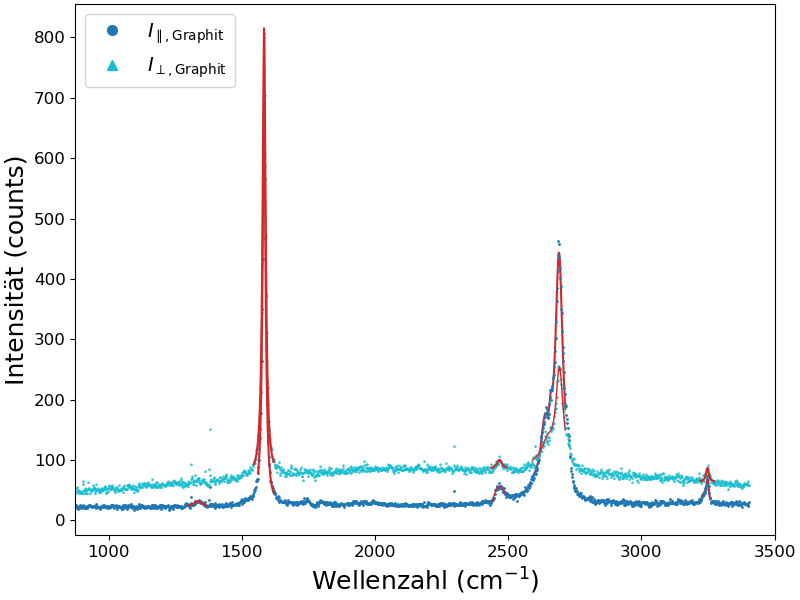

In [455]:
# Graphite everything


# Plot data
fig, ax = plt.subplots(figsize=(8,6), constrained_layout = True)


# Graphit parallel
ax.plot(df_graphit_parallel['Wavenumber'], df_graphit_parallel['Intensity'], label=r'$\mathit{I}_{\parallel, Graphit}$', ls='',
        marker='o', ms=1, c=colors[0], zorder=2)

# Plot fits
# 
ax.plot(xdata_graphite_p1, lorentzian(xdata_graphite_p1, *params_graphite_p1), c=colors[3], zorder=3)
ax.plot(xdata_graphite_p2, lorentzian(xdata_graphite_p2, *params_graphite_p2), c=colors[3], zorder=3)
ax.plot(xdata_graphite_p3, lorentzian(xdata_graphite_p3, *params_graphite_p3), c=colors[3], zorder=3, lw=1)

ax.plot(xdata_graphite_p4, three_lorentzian(xdata_graphite_p4, *params_graphite_p4), c=colors[3], zorder=1)
# ax.plot(xdata_graphite_p4, lorentzian(xdata_graphite_p4, *(list(params_graphite_p4[0:3]) + [params_graphite_p4[-1]])))
# ax.plot(xdata_graphite_p4, lorentzian(xdata_graphite_p4, *(list(params_graphite_p4[3:6]) + [params_graphite_p4[-1]])))
# ax.plot(xdata_graphite_p4, lorentzian(xdata_graphite_p4, *(list(params_graphite_p4[6:9]) + [params_graphite_p4[-1]])))

ax.plot(xdata_graphite_p5, double_lorentzian(xdata_graphite_p5, *params_graphite_p5), c=colors[3], zorder=1)
# ax.plot(xdata_graphite_p5, lorentzian(xdata_graphite_p5, *(list(params_graphite_p5[0:3]) + [params_graphite_p5[-1]])), c=colors[3])
# ax.plot(xdata_graphite_p5, lorentzian(xdata_graphite_p5, *(list(params_graphite_p5[3:6]) + [params_graphite_p5[-1]])), c=colors[3])


# Graphite perpendicular
ax.plot(df_graphit_perpendicular['Wavenumber'], df_graphit_perpendicular['Intensity'], label=r'$\mathit{I}_{\perp, Graphit}$', ls='',
        marker='^', ms=1, c=colors[9], zorder=2)

# Plot fits
ax.plot(xdata_graphite_per_p1, lorentzian(xdata_graphite_per_p1, *params_graphite_per_p1), c=colors[3], zorder=3)
ax.plot(xdata_graphite_per_p2, lorentzian(xdata_graphite_per_p2, *params_graphite_per_p2), c=colors[3], zorder=3)
ax.plot(xdata_graphite_per_p3, double_lorentzian(xdata_graphite_per_p3, *params_graphite_per_p3), c=colors[3], zorder=3, lw=1)
ax.plot(xdata_graphite_per_p4, lorentzian(xdata_graphite_per_p4, *params_graphite_per_p4), c=colors[3], zorder=3)




# figure settings
ax.set_xlabel(r'Wellenzahl ($cm^{-1}$)', fontsize=18)
ax.set_ylabel('Intensität (counts)', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(fontsize=14, markerscale=7, loc=2)
ax.set_xlim(875, 3500)